In [23]:
#Importing required libraries.
from google.colab import drive
from google.colab import files
import numpy as np
import os
import matplotlib.pyplot as plt

In [24]:
#Mounting Drive and setting up directory paths.
drive.mount("/content/drive")

dataTrDr = "/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/Diabetic Retinopathy Dataset/train/DR/"
dataTrNDr = "/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/Diabetic Retinopathy Dataset/train/No_DR/"
dataTeDr = "/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/Diabetic Retinopathy Dataset/test/DR/"
dataTeNDr = "/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/Diabetic Retinopathy Dataset/test/No_DR/"
dataValDr = "/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/Diabetic Retinopathy Dataset/valid/DR/"
dataValNDr = "/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/Diabetic Retinopathy Dataset/valid/No_DR/"

paths = [dataTrDr, dataTrNDr, dataTeDr, dataTeNDr, dataValDr, dataValNDr]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#Creating a NumPy array with names of all files at the provided path.
ldseg = np.array(os.listdir(dataTrDr))
print(ldseg)

['0af296d2f04a_png.rf.ea15c898145b8ac8e5dbadcd62f5d279.jpg'
 '107aea0d9289_png.rf.098976c687c8030dd6496ae324ba4bb0.jpg'
 '0c917c372572_png.rf.1ed4b4cb2db6da876f00bf3b0f682cbf.jpg' ...
 '0953c0ac1735_png.rf.3a8a6984376f4da3db7baa6b6e22863b.jpg'
 '0a61bddab956_png.rf.bf239142fcdfb66b1b8a02a9705cbe0b.jpg'
 '101b9ebfc720_png.rf.3f8edb961c2f8ef54ba33617948b2dac.jpg']


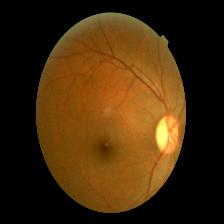

In [29]:
#Displaying example image using CV2.
import cv2
from google.colab.patches import cv2_imshow

path = paths[1] + "0709652336e2_png.rf.dbebdc038c31542de1958b99030b9cd4.jpg"
image = cv2.imread(path)
cv2_imshow(image)

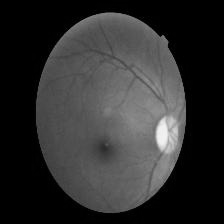

In [30]:
#Converting example image to grayscale.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

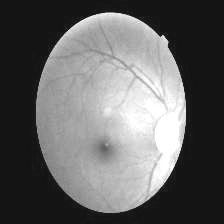

In [31]:
#Enhancing the example image by raising brightness and contrast.
alpha = 1.75
beta = 20
enhanced_image = cv2.convertScaleAbs(gray_image, alpha=alpha, beta=beta)

cv2_imshow(enhanced_image)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


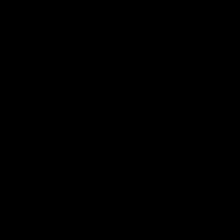

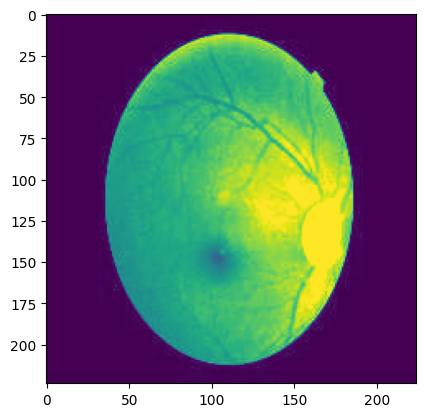

In [32]:
#Normalizing example image.
normalized_image = cv2.normalize(enhanced_image, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
print(normalized_image)
cv2_imshow(normalized_image)
plt.imshow(normalized_image)

In [ ]:
# Create a folder in the root directory
!mkdir -p "/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData"

# Write a sample file to Google Drive
cv2.imwrite("/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData/0a09aa7356c0_png.rf.7663a3af9671c42eca223f549f22c9d1.jpg", normalized_image)

In [ ]:
#Creating a NumPy array with names of all files at the provided path.
path_short = paths[5] #Specify 0-based index of desired path based on paths list in second cell.

fileList = np.array(os.listdir(path_short))
print(fileList)

import cv2
from google.colab.patches import cv2_imshow

for f in fileList:
  #Setting up path.
  path = path_short + f
  image = cv2.imread(path)
  #cv2_imshow(image)

  #Converting images to grayscale.
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #cv2_imshow(gray_image)

  #Enhancing the example image by raising brightness and contrast.
  alpha = 1.75
  beta = 20
  enhanced_image = cv2.convertScaleAbs(gray_image, alpha=alpha, beta=beta)
  #cv2_imshow(enhanced_image)

  #Normalizing example image.
  normalized_image = cv2.normalize(enhanced_image, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  #print(normalized_image)
  #cv2_imshow(normalized_image)
  plt.imshow(normalized_image)

  # Write a sample file to Google Drive.
  cv2.imwrite(f"/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/PreparedData/valid/No_DR/{f}", normalized_image)

In [ ]:
#Saving example images for MDR.
cv2.imwrite("/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/example.jpg", image)
cv2.imwrite("/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/example_gray.jpg", gray_image)
cv2.imwrite("/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/example_enhanced.jpg", enhanced_image)
#plt.savefig("/content/drive/MyDrive/Acadia University Files/2023 24/Winter Semester/COMP-3503/example_normalized.jpg") #Commented out because of white image generation, matplotlib version used on MDR.